# MovieLens 1M - Data Analysis

## Data import

First, import the necessary Python packages for the rest of the analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

MovieLens 1M data comes in three different data (.dat) files:
- movies
- users
- ratings

More information about each file can be found on the readme file.

Import each file separately and get a sense of each before merging them into one big dataset.

In [2]:
#Import movies data
movies = pd.read_table("Desktop\\MovieLens 1M\\movies.dat",
                      sep = '::',
                      names = ['movie_id', 'title', 'genre'],
                      engine = 'python')

#Show first 5 lines to make sure import was successful.
movies.head(5)

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
#Get basic information on data
print('No. of movies: ' + str(movies.shape[0]))
print('')

#See data types of the data
print(movies.info())
print('')
print(movies.shape)

No. of movies: 3883

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
movie_id    3883 non-null int64
title       3883 non-null object
genre       3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB
None

(3883, 3)


In [4]:
#Check for (make sure that there is no) missing values
if movies.isnull().values.sum() == 0:
    print('There are no missing values!')
else: print("There is missing information!")

There are no missing values!


In [5]:
#Import users data
users = pd.read_table("Desktop\\MovieLens 1M\\users.dat",
                      sep = '::',
                      names = ['user_id', 'gender', 'age', 'occupation', 'zip'],
                      engine = 'python')

#Import ratings data
ratings = pd.read_table("Desktop\\MovieLens 1M\\ratings.dat",
                      sep = '::',
                      names = ['user_id', 'movie_id', 'rating', 'timestamp'],
                      engine = 'python')

In [6]:
print('No. of users rated: ' + str(users.shape[0]))
print('Total ratings count: ' + str(ratings.shape[0]))
print('')

#Check for missing values
if users.isnull().values.sum() == 0 & ratings.isnull().values.sum() == 0:
    print('There are no missing values!')
else: print("There is missing information!")

No. of users rated: 6040
Total ratings count: 1000209

There are no missing values!


## Data Preprocessing & Exploration  
Now, let's look at some basic statistics in both users and ratings datasets to get sense of the data.

### Users Data

In [7]:
#Show the first 5 lines
users.head(5)

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
print(users.info())
print('')
print('Users dataframe shape: ' + str(users.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
user_id       6040 non-null int64
gender        6040 non-null object
age           6040 non-null int64
occupation    6040 non-null int64
zip           6040 non-null object
dtypes: int64(3), object(2)
memory usage: 236.0+ KB
None

Users dataframe shape: (6040, 5)


It can be seen that both age and occupation data are categorical values (given as integers) that do not really help us understand what they are. Hence, first let's take care of these 2 columns. Moreover, zip code column is too specific to actually help us so, we will drop that column.

In [9]:
age_dict = {1: "-18 years", 
            18: "18-24 years", 
            25: "25-34 years", 
            35: "35-44 years", 
            45: "45-49 years", 
            50: "50-55 years", 
            56: "56+ years"}

#Change the age column
users['age'] = users['age'].apply(lambda x: age_dict[x])

occu_dict = {0: "other",  1: "academic/educator", 2: "artist", 3: "clerical/admin", 4: "college/grad student",
             5: "customer service", 6: "doctor/health care", 7: "executive/managerial", 8: "farmer", 9: "homemaker",
             10: "K-12 student", 11: "lawyer", 12: "programmer", 13: "retired", 14: "sales/marketing", 15: "scientist",
             16: "self-employed", 17: "technician/engineer", 18: "tradesman/craftsman", 19: "unemployed", 20: "writer"}

#Change the occupation column
users['occu_name'] = users['occupation'].apply(lambda x: occu_dict[x])

#Drop the occupation column
users = users.drop('occupation', axis=1)

#Drop the 'zip' column
users = users.drop('zip', axis=1)

users.head(5)

,user_id,gender,age,occu_name
0,1,F,-18 years,K-12 student
1,2,M,56+ years,self-employed
2,3,M,25-34 years,scientist
3,4,M,45-49 years,executive/managerial
4,5,M,25-34 years,writer


The ages of the users are given as a categorical value which prevents us from finding the average age of the users. However, we can find the distribution of age groups in order to understand the movie watching (and rating) tendencies of different age groups.

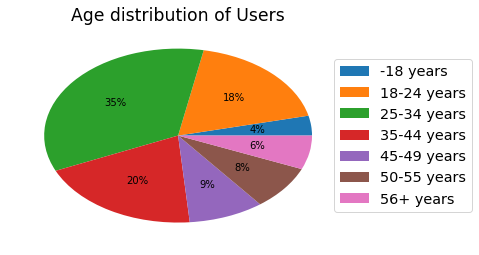

In [10]:
#Distribution of ages of users
ages = users[['user_id', 'age']].groupby('age', as_index=False).count()

#Create a pie chart to show
plt.pie(ages['user_id'], labels = None, autopct='%1.0f%%')

plt.title('Age distribution of Users', fontsize = 'xx-large')
plt.legend(ages['age'], 
           bbox_to_anchor=(1.4,0.5), 
           loc = 7,
           fontsize = 'x-large')

plt.show()

It can be seen that the majority of users that rate movies are between 25 -34 years old with a relatively big difference compared to the rest.

Now, let's check the gender distribution of the users (irrelevant to the ratings or movies, so far)

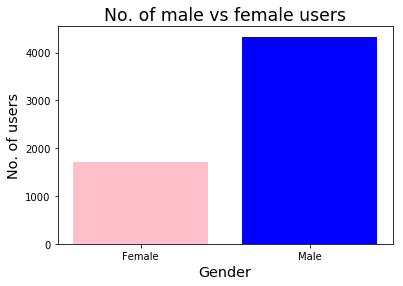

In [11]:
genders = users[['user_id', 'gender']].groupby('gender', as_index=False).count()

#Create bar plot
plt.bar(np.arange(len(genders['gender'])), genders['user_id'], tick_label=['Female','Male'], color = ['pink', 'blue'])

plt.xlabel("Gender", fontsize = 'x-large')
plt.ylabel("No. of users", fontsize = 'x-large')
plt.title("No. of male vs female users", fontsize = 'xx-large')

plt.show()


Without checking the specific movies we can see that most users are men (with more than twice the number of females!)

Finally, we can check users with which occupation have the most time to watch movies (assuming the more they watch the more they rate, of course) and who has the least.

In [12]:
occu = users[['user_id', 'occu_name']].groupby('occu_name', as_index=False).count()
occu = occu.sort_values(by = 'user_id', ascending=False)
most = occu.iloc[0][0]
least = occu.iloc[-1][0]

print("Users that watch movies the most are " + str(most) + 's')
print("Users that watch movies the least are " + str(least) + 's')

Users that watch movies the most are college/grad students
Users that watch movies the least are farmers


Unsurprisingly, we see that the users that movies the most are college/grad students (category 4). 

On the other hand, it turns out that farmers (category 8) don't really watch movies. This can probably be explained by long working hours of the farmers and also the lack of technology/internet in the rural areas.

Now that we know more about our users we can move on to our movies and explore the dataset.

### Movies Data

In [13]:
#Show the first 5 lines 
movies.head(5)

,movie_id,title,genre
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


We will organize the data for easier analysis later on. 

First, separate the years of the movies and add them as a new column to the dataframe. Then, remove the years from the titles.
Splitting according to the ' ' (space) between the title and the year won't really work because of some movies (ex: The Associate of year 1982) with no space between the title and the year


In [14]:
#Show the movie as an example
movies[movies['title'].map(lambda x: 'Associate' in x)]

,movie_id,title,genre
988,1001,"Associate, The (L'Associe)(1982)",Comedy
1097,1113,"Associate, The (1996)",Comedy


In [15]:
#Separate the year and the title
movies['year'] = movies['title'].apply(lambda x: x[-5:-1])

#Remove the year from the title
movies['title'] = movies['title'].apply(lambda x: x[:-6])

In [16]:
movies.head(5)

,movie_id,title,genre,year
0,1,Toy Story,Animation|Children's|Comedy,1995
1,2,Jumanji,Adventure|Children's|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama,1995
4,5,Father of the Bride Part II,Comedy,1995


In [17]:
#Check that the year column is organized
movies['year'].unique()

array(['1995', '1994', '1996', '1976', '1993', '1992', '1988', '1967',
       '1964', '1977', '1965', '1982', '1962', '1990', '1991', '1989',
       '1937', '1940', '1969', '1981', '1973', '1970', '1960', '1955',
       '1956', '1959', '1968', '1980', '1975', '1986', '1948', '1943',
       '1963', '1950', '1946', '1987', '1997', '1974', '1958', '1949',
       '1972', '1998', '1933', '1952', '1951', '1957', '1961', '1954',
       '1934', '1944', '1942', '1941', '1953', '1939', '1947', '1945',
       '1938', '1935', '1936', '1926', '1932', '1930', '1971', '1979',
       '1966', '1978', '1985', '1983', '1984', '1931', '1922', '1927',
       '1929', '1928', '1925', '1923', '1999', '1919', '2000', '1920',
       '1921'], dtype=object)

Let's look at the years of the movies.

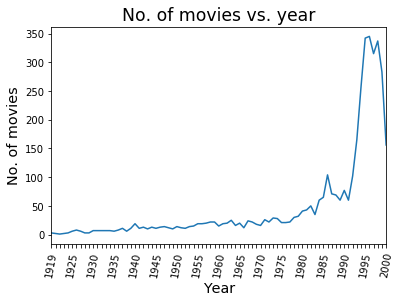

In [18]:
years = movies[['movie_id', 'year']].groupby('year', as_index= False).count()

#Number of releases according to years
ax1 = years.plot(legend= None)

plt.xticks(np.arange(len(years['year'])), years['year'], rotation=80)
plt.setp(ax1.get_xticklabels(), visible=False)

plt.xlabel("Year", fontsize = 'x-large')
plt.ylabel("No. of movies", fontsize = 'x-large')
plt.title("No. of movies vs. year", fontsize = 'xx-large')

#In order to avoid overlapping, show only every 5 years
labels = ax1.get_xticklabels()
for label in labels[::5]:
    label.set_visible(True)
    
plt.show()

According to the graph it can be seen the movies in the database are mostly from 1990 and later. This somewhat might show us the interests of the user where they prefer watching relative new movies than the old ones.

Now let's dig into the genres.

First, let's organize the genre column to be able to analyze easier. Plus, let's find the movies that combine the most number of genres.

In [19]:
#Find the maximum number of genres combined in a movie
movies['#genre'] = movies['genre'].apply(lambda x: x.count('|')+1)

genrecount = movies.sort_values(by = '#genre', ascending=False)
most = genrecount.iloc[0][1]
least = genrecount.iloc[-1][1]

print('The movie with the most genres combined is "' + str(most) + '" with ' + str(genrecount.iloc[0][4]) + ' different genres:')
print(str(genrecount.iloc[0][2]).split('|'))

The movie with the most genres combined is "Transformers: The Movie, The " with 6 different genres:
['Action', 'Animation', "Children's", 'Sci-Fi', 'Thriller', 'War']


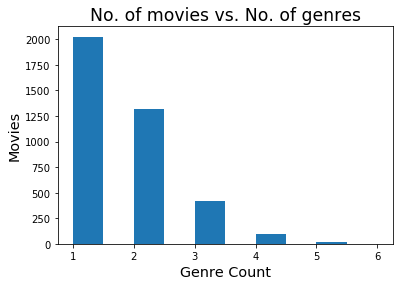

In [20]:
#Check the histogram of genres
plt.hist(movies['#genre'])

plt.xlabel("Genre Count", fontsize = 'x-large')
plt.ylabel("Movies", fontsize = 'x-large')
plt.title("No. of movies vs. No. of genres", fontsize = 'xx-large')

plt.show()

It can be seen that most of the movies have only 1 genre.

Now, let's see which genre has the most number of movies.

In [21]:
genrelist = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 
             'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

#Create a dictionary with all the genres and number of movies in that genre.
genredict = {}
for g in genrelist:
    count = movies[movies['genre'].map(lambda x: g in x)]
    genredict[g] = len(count)

genredict

{'Action': 503,
 'Adventure': 283,
 'Animation': 105,
 "Children's": 251,
 'Comedy': 1200,
 'Crime': 211,
 'Documentary': 127,
 'Drama': 1603,
 'Fantasy': 68,
 'Film-Noir': 44,
 'Horror': 343,
 'Musical': 114,
 'Mystery': 106,
 'Romance': 471,
 'Sci-Fi': 276,
 'Thriller': 492,
 'War': 143,
 'Western': 68}

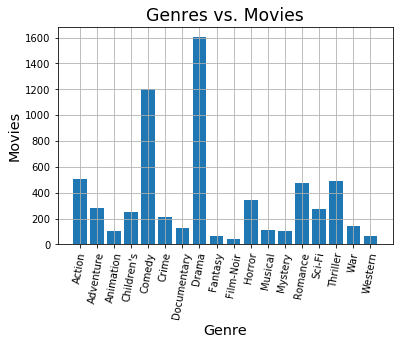

In [22]:
#Create bar plot
plt.bar(np.arange(len(genredict.keys())), genredict.values())

plt.xticks(np.arange(len(genredict.keys())), genredict.keys(), rotation=80)
plt.xlabel("Genre", fontsize = 'x-large')
plt.ylabel("Movies", fontsize = 'x-large')
plt.title("Genres vs. Movies", fontsize = 'xx-large')
plt.grid()

plt.show()

Finally, let's check the ratings data for more interesting analysis.

### Ratings Data

In [23]:
#Show the first 5 lines
ratings.head(5)

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [24]:
#Basic statistics of all the ratings in the data
print(ratings['rating'].describe())
print('')

#Basic info on the data
print(ratings.info())

count    1.000209e+06
mean     3.581564e+00
std      1.117102e+00
min      1.000000e+00
25%      3.000000e+00
50%      4.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
user_id      1000209 non-null int64
movie_id     1000209 non-null int64
rating       1000209 non-null int64
timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB
None


First, let's take care of the timestamp column to actually understand when each movie was voted.

In [25]:
#Create a new column of datetime objects from the timestamp column
ratings['date'] = pd.to_datetime(ratings['timestamp'], unit='s')

#Keep only the year of the rating as we don't have much to do with the hours or even days.
ratings['date'] = ratings['date'].apply(lambda x: x.strftime('%Y'))

#After taking care of the time, we no longer need the seconds
ratings = ratings.drop('timestamp', axis=1)

ratings.head(5)

,user_id,movie_id,rating,date
0,1,1193,5,2000
1,1,661,3,2000
2,1,914,3,2000
3,1,3408,4,2000
4,1,2355,5,2001


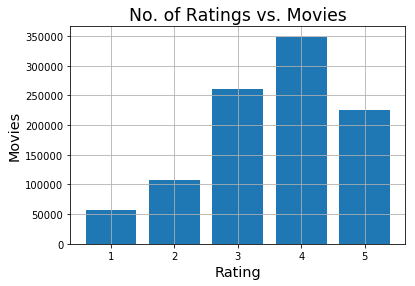

In [26]:
ratingcount = ratings[['movie_id','rating']].groupby('rating', as_index=False).count()

#Create a barplot to get an overall sense of rating data
plt.bar(np.arange(len(ratingcount['rating'])), ratingcount['movie_id'])

plt.xticks(np.arange(len(ratingcount['rating'])), ratingcount['rating'])
plt.xlabel("Rating", fontsize = 'x-large')
plt.ylabel("Movies", fontsize = 'x-large')
plt.title("No. of Ratings vs. Movies", fontsize = 'xx-large')
plt.grid()

plt.show()

It can be seen that the majority of the ratings given are 4 stars. 

(Note: ratings are whole-star ratings only)

Let's find top 10 highest rated and in general most rated movies. In order to get a better explanation we will check only the movies that were rated at least 1000 times.

Of course we can always decide what's more importnat and change the values.

In [27]:
top = ratings.groupby('movie_id').agg({'user_id' : 'count', 'rating' : 'mean'}) \
             .rename(columns = ({'user_id' : '#rating', 'rating' : 'avg_rating'}))

#Find the highest rated movies
top10 = top[top['#rating'].map(lambda x: x>1000)].sort_values(by= 'avg_rating', ascending = False)
top10.head(10)

,#rating,avg_rating
movie_id,,
318,2227,4.554558
858,2223,4.524966
50,1783,4.517106
527,2304,4.510417
1198,2514,4.477725
904,1050,4.476190
260,2991,4.453694
750,1367,4.449890
912,1669,4.412822


Let's check the boxplot of average ratings and rating counts of all the movies.

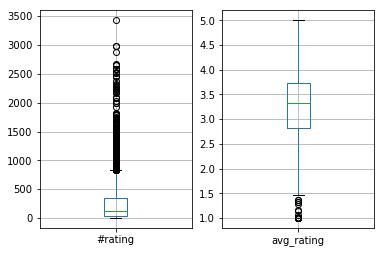

In [28]:
plt.figure(1)
plt.subplot(121)
top.boxplot(column='#rating')

plt.subplot(122)
top.boxplot(column='avg_rating')
plt.show()


We see that most of the movies have few reviews and there are only a few movies that have more that 2000 reviews. 
About the average ratings of movies, we see that the average of all the movies is about 3.3 stars.

In [29]:
#Find the most rated movies
mostrated = top.sort_values(by= '#rating', ascending = False)
mostrated.head(5)

,#rating,avg_rating
movie_id,,
2858,3428,4.317386
260,2991,4.453694
1196,2990,4.292977
1210,2883,4.022893
480,2672,3.763847


As we can see, even though we have our top10 and most rated movies, we can't infer much without the names of the movies. Thus, now we will combine all the data we have in order to analyse the connections between different features.

## Combined (Full) Data

Let's merge the 3 datasets and get one big dataset combinig everything for a better analysis.

In [30]:
#Merge 1
halfds = pd.merge(users, ratings, on= 'user_id')

#Merge 2
fullds = pd.merge(halfds, movies, on= 'movie_id')

#Show the final dataframe
fullds.head(5)

,user_id,gender,age,occu_name,movie_id,rating,date,title,genre,year,#genre
0,1,F,-18 years,K-12 student,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1
1,2,M,56+ years,self-employed,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1
2,12,M,25-34 years,programmer,1193,4,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1
3,15,M,25-34 years,executive/managerial,1193,4,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1
4,17,M,50-55 years,academic/educator,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1


In [31]:
#Show basic information
print(fullds.info())
print('')
print(fullds.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 11 columns):
user_id      1000209 non-null int64
gender       1000209 non-null object
age          1000209 non-null object
occu_name    1000209 non-null object
movie_id     1000209 non-null int64
rating       1000209 non-null int64
date         1000209 non-null object
title        1000209 non-null object
genre        1000209 non-null object
year         1000209 non-null object
#genre       1000209 non-null int64
dtypes: int64(4), object(7)
memory usage: 91.6+ MB
None

(1000209, 11)


Now that we have a full dataset with all the information combined, we can finally name our most rated and highest rated movies.

In [32]:
top_named = fullds.groupby('title', as_index = False).agg({'user_id' : 'count', 'rating' : 'mean'}) \
             .rename(columns = ({'user_id' : '#rating', 'rating' : 'avg_rating'}))

#Find the highest rated movies
top10_n = top_named[top_named['#rating'].map(lambda x: x>1000)].sort_values(by= 'avg_rating', ascending = False)
top10_n.insert(0, column = 'rank', value = range(1, len(top10_n)+1))
top10_n.head(10)

,rank,title,#rating,avg_rating
2934,1,"Shawshank Redemption, The",2227,4.554558
1345,2,"Godfather, The",2223,4.524966
3464,3,"Usual Suspects, The",1783,4.517106
2866,4,Schindler's List,2304,4.510417
2678,5,Raiders of the Lost Ark,2514,4.477725
2705,6,Rear Window,1050,4.476190
3117,7,Star Wars: Episode IV - A New Hope,2991,4.453694
971,8,Dr. Strangelove or: How I Learned to Stop Worr...,1367,4.449890
606,9,Casablanca,1669,4.412822
2979,10,"Sixth Sense, The",2459,4.406263


In [33]:
#Find the most rated movies
mostrated_n = top_named.sort_values(by= '#rating', ascending = False)
mostrated_n.head(5)

,title,#rating,avg_rating
126,American Beauty,3428,4.317386
3117,Star Wars: Episode IV - A New Hope,2991,4.453694
3118,Star Wars: Episode V - The Empire Strikes Back,2990,4.292977
3119,Star Wars: Episode VI - Return of the Jedi,2883,4.022893
1773,Jurassic Park,2672,3.763847


In order to find the most "classic" or influential movies, we will explore the amount of ratings a movie got years (say, 30) after it's realease date.

Also, in order to make sure that it really influenced more than just a few people we will check only the movies with more than 200 ratings after 30 years.


In [34]:
#Create a new column for year difference between the date movie was released and when it was rated
fullds[['date', 'year']] = fullds[['date', 'year']].astype(np.int64) #Convert values to integers 
fullds['yeardiff'] = fullds['date'] - fullds['year']

#Find the movies that have ratings 30 years after their release date.
mostinf = fullds[fullds['yeardiff'].map(lambda x: x>30)]
mostinf = mostinf.groupby('title', as_index = False).agg({'user_id':'count','rating':'mean'})\
                 .rename(columns = ({'user_id' : '#rating', 'rating' : 'avg_rating'}))

#Take the movies with more than 200 ratings
mostinf = mostinf[mostinf['#rating'].map(lambda x: x>200)].sort_values(by='avg_rating', ascending = False)

mostinf.head(5)

,title,#rating,avg_rating
488,Seven Samurai (The Magnificent Seven) (Shichin...,628,4.560510
530,Sunset Blvd. (a.k.a. Sunset Boulevard),470,4.491489
458,Rear Window,1050,4.476190
427,Paths of Glory,230,4.473913
548,"Third Man, The",480,4.452083


Let's start digging deeper and look for more statistics.

First, let's see how the average rating and number of ratings of each movie changes according to different age groups.

In [35]:
title_age = fullds.pivot_table(values = ['rating', 'user_id'], index = ['movie_id','title', 'age'], 
                               aggfunc = {'user_id' : 'count', 'rating' : [min, max, 'mean', 'std']})\
                    .rename(columns = {'user_id' : '#ratings'})

#Show an example of the movie 'Toy Story'
title_age.loc[1]

rating                         #ratings
                          max      mean min       std    count
title      age                                                
Toy Story  -18 years        5  3.919643   1  0.950471      112
           18-24 years      5  4.017857   1  0.882159      448
           25-34 years      5  4.201266   1  0.814164      790
           35-44 years      5  4.302600   1  0.789845      423
           45-49 years      5  4.104895   1  0.861650      143
           50-55 years      5  4.092593   1  0.881132      108
           56+ years        5  3.886792   1  1.031436       53

We can see that Toy Story movie was a very succesfull movie with pretty high ratings across almost age groups.

In [36]:
title_occu = fullds.pivot_table(values = ['rating', 'user_id'], index = ['movie_id','title', 'occu_name'], 
                               aggfunc = {'user_id' : 'count', 'rating' : [min, max, 'mean', 'std']})\
                    .rename(columns = {'user_id' : '#ratings'})

#Show first 2 movies as an example
title_occu.loc[1:2]

rating                          \
                                            max      mean min       std   
movie_id title      occu_name                                             
1        Toy Story  K-12 student              5  3.904255   1  0.951164   
                    academic/educator         5  4.229299   1  0.831068   
                    artist                    5  4.000000   1  0.933053   
                    clerical/admin            5  4.492537   3  0.636590   
                    college/grad student      5  4.040404   1  0.903288   
                    customer service          5  4.025641   2  0.902837   
                    doctor/health care        5  4.394737   1  0.849768   
                    executive/managerial      5  4.189055   1  0.808752   
                    farmer                    5  4.500000   4  0.707107   
                    homemaker                 5  4.028571   3  0.890661   
                    lawyer                    5  4.142857   3  0.809606   
                    other                     5  4.211111   1  0.846964   
                    programmer                5  4.271429   2  0.812163   
                    retired                   5  4.058824   3  0.826936   
                    sales/marketing           5  4.084112   2  0.778502   
                    scientist                 5  4.072727   1  0.835653   
                    self-employed             5  4.168831   3  0.784766   
                    technician/engineer       5  4.160714   1  0.821350   
                    tradesman/craftsman       5  4.190476   2  0.928388   
                    unemployed                5  3.960000   3  0.734847   
                    writer                    5  4.046296   1  0.910831   
2        Jumanji    K-12 student              5  3.322581   1  1.012821   
                    academic/educator         5  3.301887   1  0.911147   
                    artist                    5  2.970588   1  1.058452   
                    clerical/admin            5  3.285714   1  0.956183   
                    college/grad student      5  3.116505   1  0.993123   
                    customer service          5  3.400000   1  0.985611   
                    doctor/health care        5  3.107143   1  1.065947   
                    executive/managerial      5  3.115942   1  1.007855   
                    farmer                    4  2.666667   2  1.154701   
                    homemaker                 5  3.500000   2  0.925820   
                    lawyer                    4  3.181818   1  1.078720   
                    other                     5  3.163462   1  1.015516   
                    programmer                5  3.257143   2  0.852086   
                    retired                   3  2.500000   2  0.707107   
                    sales/marketing           5  3.333333   1  0.922266   
                    scientist                 5  3.526316   1  0.964274   
                    self-employed             5  3.068966   1  0.961065   
                    technician/engineer       5  3.425926   1  0.881719   
                    tradesman/craftsman       5  3.214286   1  1.251373   
                    unemployed                5  3.100000   1  1.100505   
                    writer                    5  3.071429   1  1.015749   

                                         #ratings  
                                            count  
movie_id title      occu_name                      
1        Toy Story  K-12 student               94  
                    academic/educator         157  
                    artist                     86  
                    clerical/admin             67  
                    college/grad student      297  
                    customer service           39  
                    doctor/health care         76  
                    executive/managerial      201  
                    farmer                      2  
                    homemaker            

## Preparation for Recommender Systems

After checking some statistics of the data, now let's prepare the data for the use of recommender systems algorithm.

For the recommender systems we need the data in a specific where we only need the user IDs, movie IDs and the rating of each user to each movie. We will call it the R matrix for later use.

NOTE: We expect to see a sparse matrix as not every user rated every movie and not every movie was rated by every user.

In [37]:
fullds.head(5)

,user_id,gender,age,occu_name,movie_id,rating,date,title,genre,year,#genre,yeardiff
0,1,F,-18 years,K-12 student,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1,25
1,2,M,56+ years,self-employed,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1,25
2,12,M,25-34 years,programmer,1193,4,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1,25
3,15,M,25-34 years,executive/managerial,1193,4,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1,25
4,17,M,50-55 years,academic/educator,1193,5,2000,One Flew Over the Cuckoo's Nest,Drama,1975,1,25


In [43]:
#Find the movie count
movie_cnt = len(fullds['movie_id'].unique())

#Users
user_cnt = len(fullds['user_id'].unique())

#Total ratings
rating_cnt = len(fullds)

print(str(movie_cnt) + ' movies were rated by ' + str(user_cnt) +' users with a total of ' + str(rating_cnt) + ' reviews')

3706 movies were rated by 6040 users with a total of 1000209 reviews


In [58]:
R = pd.pivot_table(fullds, values = 'rating', index = 'user_id', columns = 'movie_id', dropna = False)

In [65]:
#Change the missing values (NaN) to number 0
R=R.fillna(0)

R.head(5)

movie_id,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
user_id,,,,,,,,,,,,,,,,,,,,,
1,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Let's create a new dataset only with this matrix that we need to use to predict the missing values (0) for movie recommendation.

In [70]:
#Save the data as a new dataset
path = "Desktop\\MovieLens 1M\\"
R.to_csv(path + 'R.csv', index_label= 'user_id', header='movie_id' )